In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\Desktop\\summer_term\\Project\\housing.csv")


# Step 1: Remove rows with null values in 'total_bedrooms'
df = df[df['total_bedrooms'].notnull()]

# Step 2: Add 'area_density' = population / households
df['area_density'] = df['population'] / df['households']

# Step 3: Add 'income_category'
income_category = []
for income in df['median_income']:
    if income > 6:
        income_category.append('High')
    else:
        income_category.append('Low')
df['income_category'] = income_category

# Step 4: Add 'age_group' based on 'housing_median_age'
age_group = []
for age in df['housing_median_age']:
    if age <= 15:
        age_group.append('New')
    elif age <= 35:
        age_group.append('Middle-aged')
    else:
        age_group.append('Old')
df['age_group'] = age_group


# Step 1: Create dummy columns without prefix
dummies = pd.get_dummies(df['ocean_proximity'], prefix='', prefix_sep='')

# Step 2: Convert them to integers (0/1)
dummies = dummies.astype(int)

# Step 3: Drop original 'ocean_proximity' and add the new columns
df = df.drop('ocean_proximity', axis=1)
df = pd.concat([df, dummies], axis=1)




# Save the cleaned and updated file (optional)
df.to_csv(r"C:\Users\HP\OneDrive\Documents\Desktop\summer_term\Project\housing_cleaned.csv", index=False)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

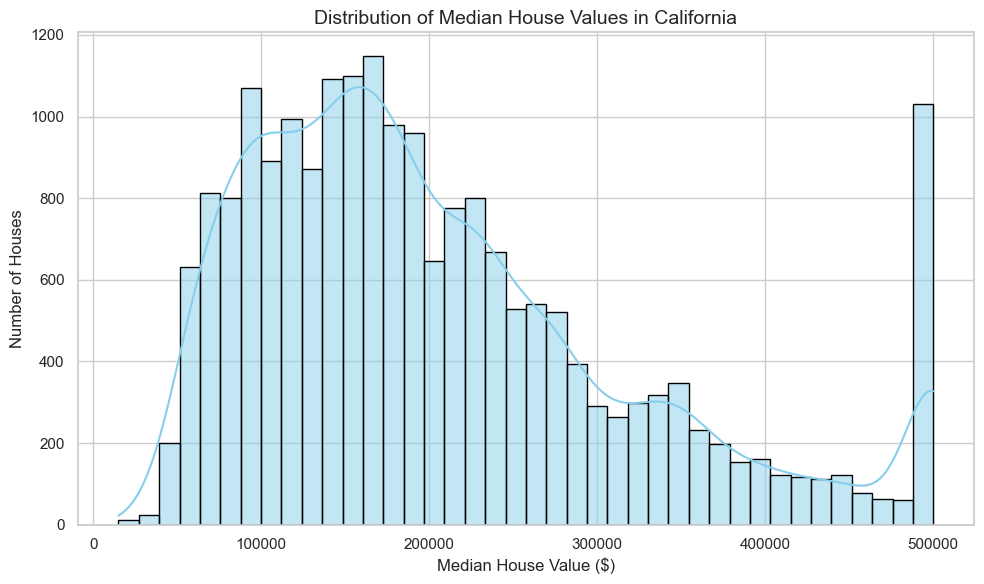

In [4]:
sns.set(style='whitegrid')


# 4. Plot: Distribution of Median House Values
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=40, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Median House Values in California", fontsize=14)
plt.xlabel("Median House Value ($)")
plt.ylabel("Number of Houses")
plt.tight_layout()
plt.grid(True)
plt.show()

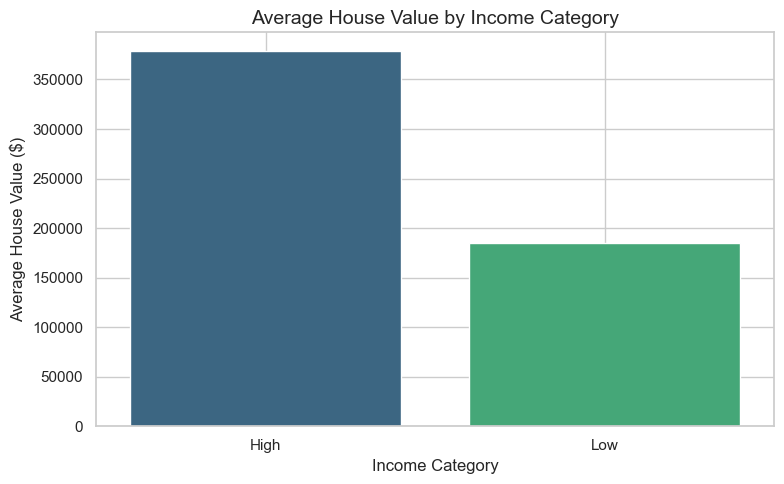

In [12]:
plt.figure(figsize=(8, 5))
avg_income_price = df.groupby('income_category')['median_house_value'].mean().reset_index()
sns.barplot(data=avg_income_price, x='income_category', y='median_house_value',hue = 'income_category', palette='viridis',legend = False)
plt.title("Average House Value by Income Category", fontsize=14)
plt.xlabel("Income Category")
plt.ylabel("Average House Value ($)")
plt.tight_layout()
plt.grid(True)
plt.show()

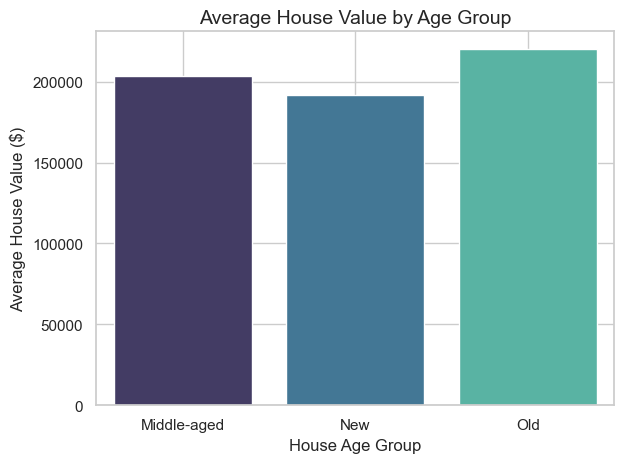

In [13]:
# Grouping data by existing 'age_group' column
age_group_avg = df.groupby('age_group')['median_house_value'].mean().reset_index()

# Sort if needed (optional)
age_order = ['New', 'Mid-aged', 'Old']

# Plotting the average house value by age group
sns.barplot(data=age_group_avg, x='age_group', y='median_house_value', hue='age_group', palette='mako')


plt.title("Average House Value by Age Group", fontsize=14)
plt.xlabel("House Age Group")
plt.ylabel("Average House Value ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

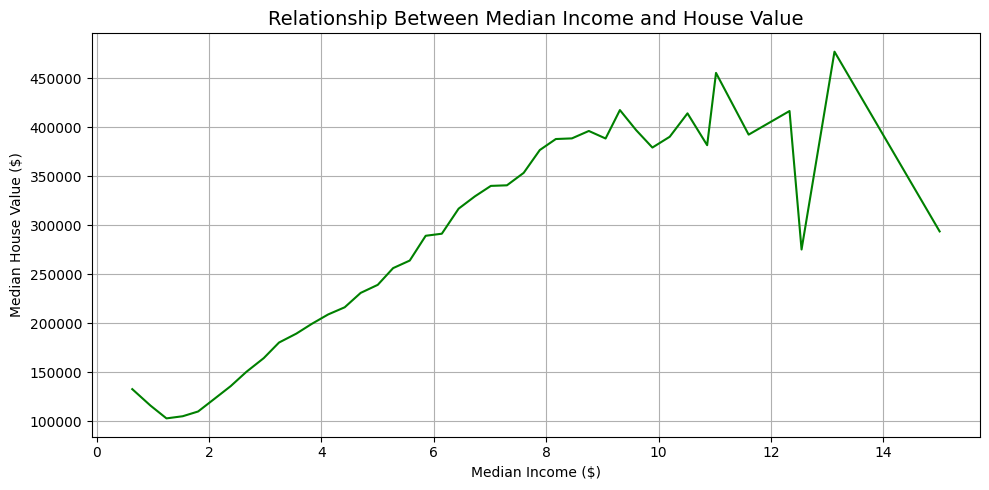

In [6]:
# Filter for prices < $500,000
df_line = df[df['median_house_value'] < 500000].copy()

# Bin the income into 50 equal-width ranges
df_line['income_bin'] = pd.cut(df_line['median_income'], bins=50)

# Group and calculate mean, with warning fix
binned = df_line.groupby('income_bin', observed=False)[['median_income', 'median_house_value']].mean().reset_index()

# Plot the smooth trend line
plt.figure(figsize=(10, 5))
sns.lineplot(data=binned, x='median_income', y='median_house_value', color='green')
plt.title("Relationship Between Median Income and House Value", fontsize=14)
plt.xlabel("Median Income ($)")
plt.ylabel("Median House Value ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

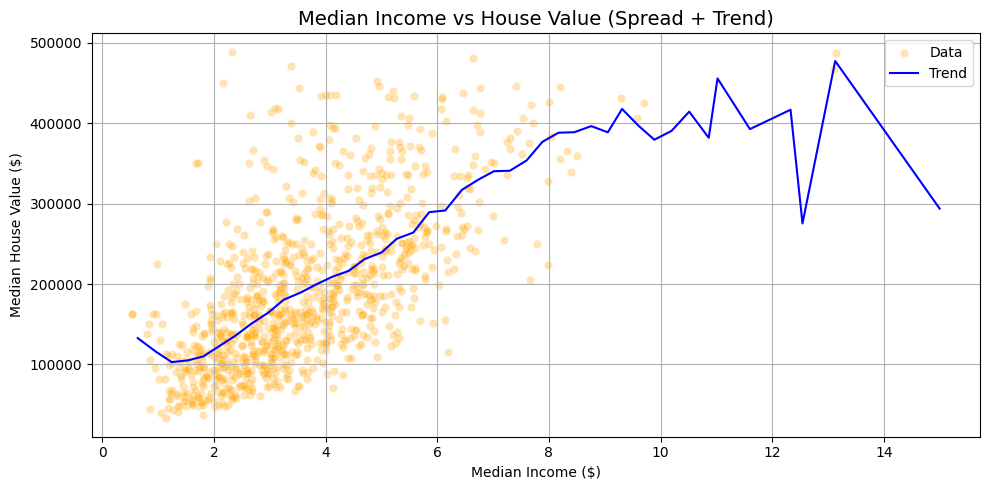

In [7]:
# Filter out price caps
df_line = df[df['median_house_value'] < 500000].copy()

# Bin median_income into 50 intervals
df_line['income_bin'] = pd.cut(df_line['median_income'], bins=50)

# Calculate mean house value in each income bin (with FutureWarning fix)
binned_avg = df_line.groupby('income_bin', observed=False)[['median_income', 'median_house_value']].mean().reset_index()

# Plot combo chart
plt.figure(figsize=(10, 5))

# Scatter plot (individual points)
sns.scatterplot(data=df_line.sample(1000), x='median_income', y='median_house_value', alpha=0.3, color='orange', label='Data')

# Line plot (trend)
sns.lineplot(data=binned_avg, x='median_income', y='median_house_value', color='blue', label='Trend')

# Labels and layout
plt.title("Median Income vs House Value (Spread + Trend)", fontsize=14)
plt.xlabel("Median Income ($)")
plt.ylabel("Median House Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


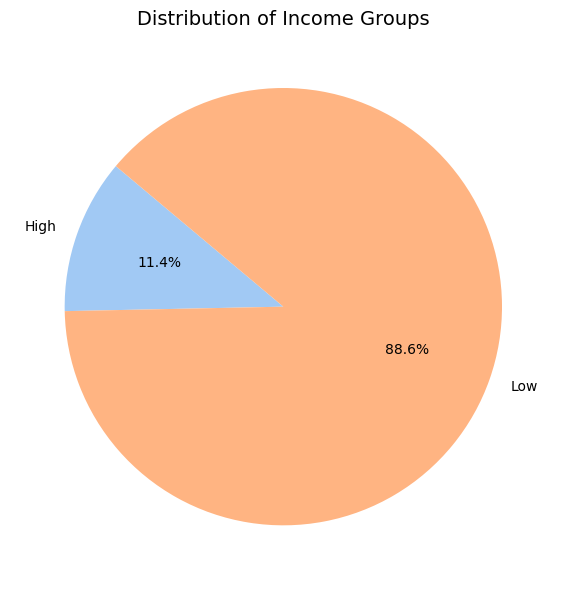

In [8]:
# Count income group occurrences
income_counts = df['income_category'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    income_counts,
    labels=income_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

# Add title and layout
plt.title("Distribution of Income Groups", fontsize=14)
plt.tight_layout()
plt.show()


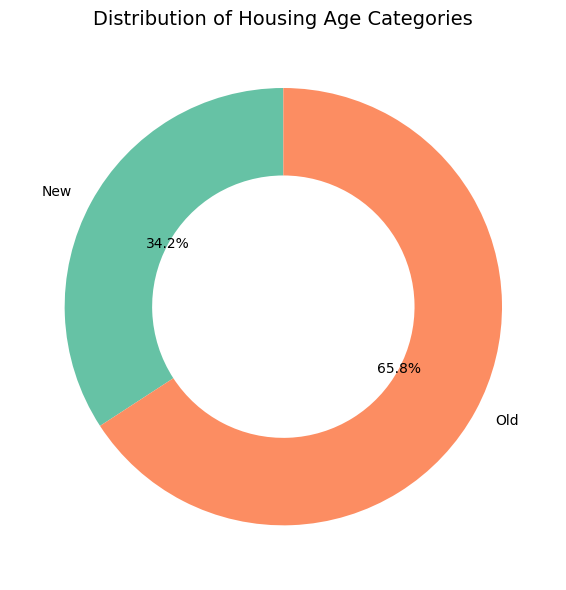

In [10]:
# Count valid age group entries only
age_counts = df['age_group'].dropna().value_counts().reindex(['New', 'Mid-aged', 'Old'])

# Drop NaN counts if they remain (optional safeguard)
age_counts = age_counts.dropna()

# Donut Chart
plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'width': 0.4}
)

plt.title("Distribution of Housing Age Categories", fontsize=14)
plt.tight_layout()
plt.show()


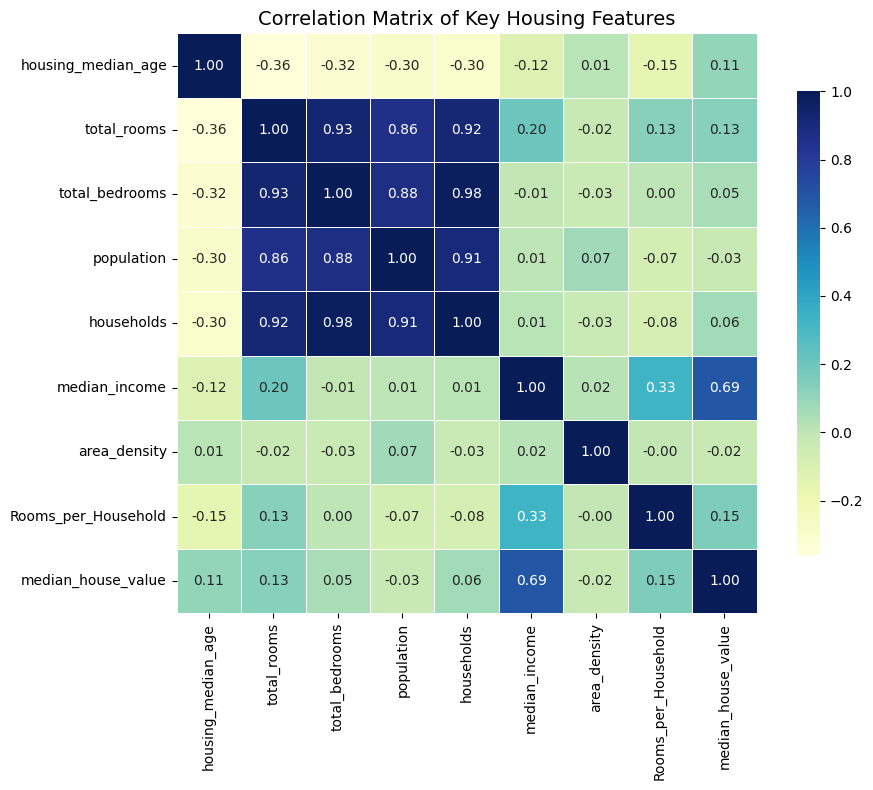

In [7]:
df['Rooms_per_Household'] = df['total_rooms'] / df['households']

# Feature list
cols = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income', 'area_density', 'Rooms_per_Household',
    'median_house_value'
]

# Filter available columns only (handles any typos or missing columns)
available_cols = [col for col in cols if col in df.columns]

# Drop NA rows in those columns
corr_df = df[available_cols].dropna()

# Compute correlation matrix
correlation = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix of Key Housing Features", fontsize=14)
plt.tight_layout()
plt.show()


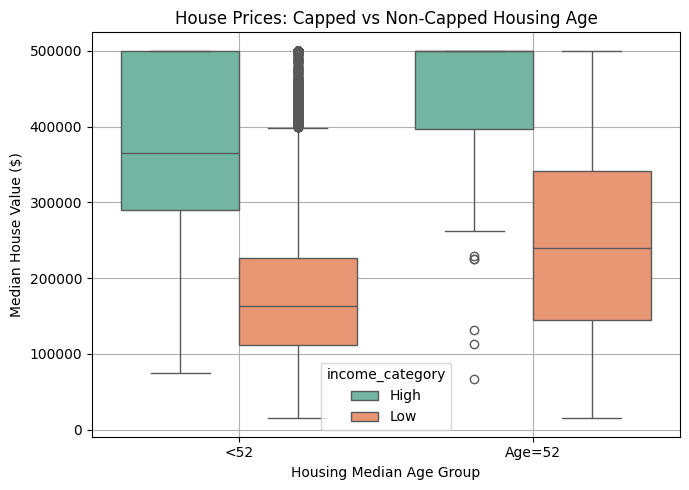

In [17]:
df['is_capped'] = df['housing_median_age'].apply(lambda x: 'Age=52' if x == 52 else '<52')

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='is_capped', y='median_house_value', palette='Set2',hue='income_category')

plt.title("House Prices: Capped vs Non-Capped Housing Age")
plt.xlabel("Housing Median Age Group")
plt.ylabel("Median House Value ($)")
plt.grid(True)
plt.tight_layout()
plt.show()
